In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
results_dir = Path("../results")
all_files = list(results_dir.glob("*_results.json"))

In [3]:
df_list = [pd.read_json(f, lines=True) for f in all_files]
df = pd.concat(df_list, ignore_index=True)

In [4]:
print("Parsed Results:")
print(df.head())

Parsed Results:
                                   model  \
0  distilbert-base-cased-distilled-squad   
1  distilbert-base-cased-distilled-squad   
2  distilbert-base-cased-distilled-squad   
3  distilbert-base-cased-distilled-squad   
4  distilbert-base-cased-distilled-squad   

                                            question  \
0  Which NFL team represented the AFC at Super Bo...   
1  Which NFL team represented the NFC at Super Bo...   
2                Where did Super Bowl 50 take place?   
3                  Which NFL team won Super Bowl 50?   
4  What color was used to emphasize the 50th anni...   

                                             context  \
0  Super Bowl 50 was an American football game to...   
1  Super Bowl 50 was an American football game to...   
2  Super Bowl 50 was an American football game to...   
3  Super Bowl 50 was an American football game to...   
4  Super Bowl 50 was an American football game to...   

                                          pre

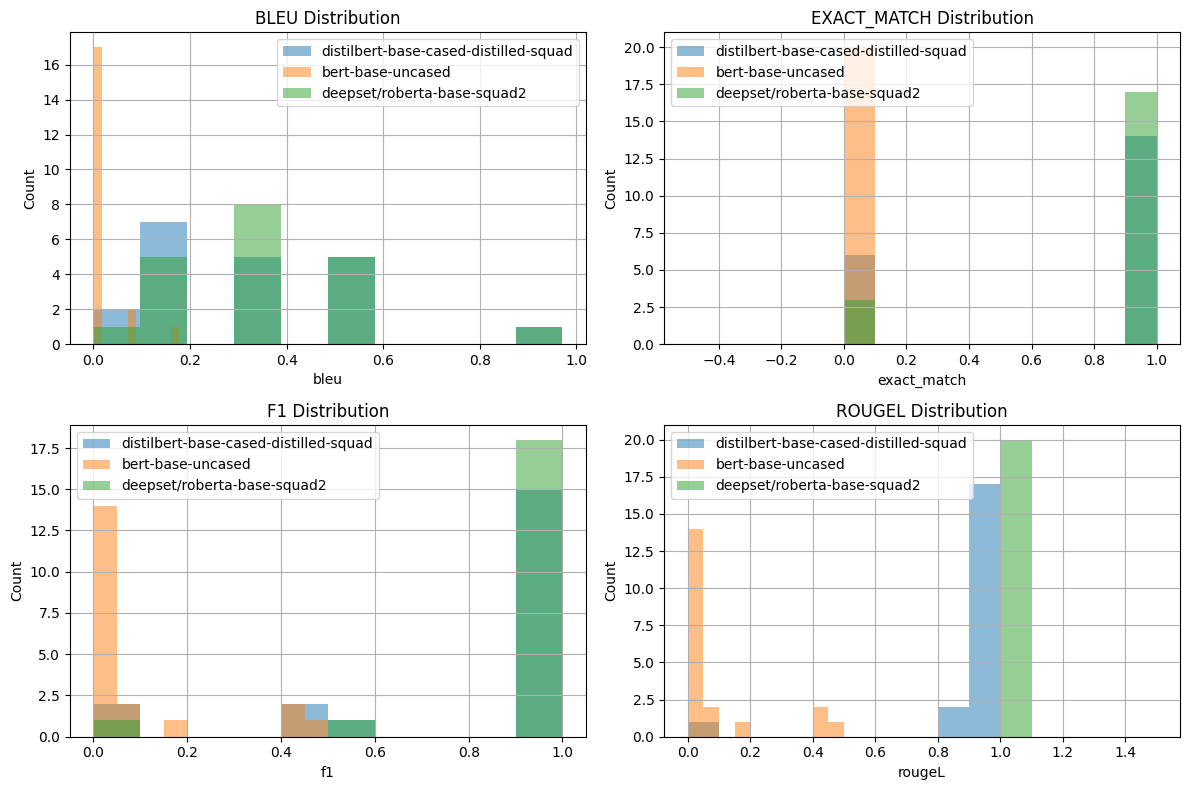

In [5]:
metrics = ["bleu", "exact_match", "f1", "rougeL"]
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, metric in enumerate(metrics):
    if metric in df.columns:
        for model_name in df['model'].unique():
            df[df['model'] == model_name][metric].hist(
                ax=axes[i], bins=10, alpha=0.5, label=model_name
            )
        axes[i].set_title(f"{metric.upper()} Distribution")
        axes[i].set_xlabel(metric)
        axes[i].set_ylabel("Count")
        axes[i].legend()

plt.tight_layout()
plt.show()

In [6]:
# Average scores
avg_scores = df.groupby('model')[metrics].mean()
print("\nAverage Scores per Model:")
print(avg_scores)


Average Scores per Model:
                                          bleu  exact_match       f1   rougeL
model                                                                        
bert-base-uncased                      0.01985         0.00  0.08120  0.08085
deepset/roberta-base-squad2            0.35855         0.85  0.92085  1.00000
distilbert-base-cased-distilled-squad  0.32255         0.70  0.81085  0.93000
